# Prediction of CO2 Emissions Using Global Sustainability Data

## Group 9

### Date: 12th April, 2024

### IE 7275: Data Mining in Engineering

In [1]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("global-data-on-sustainable-energy.csv")
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [3]:
df.shape

(3649, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [5]:
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [6]:
df.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

## Data Pre Processing

In [7]:
df=df.rename(columns = {"Density\\n(P/Km2)":"Density (P/km2)",
                  "Value_co2_emissions_kt_by_country":"CO2 emissions value by country (kT)",
                  "Access to clean fuels for cooking":"Access to clean fuels for cooking (% of population)",
                  "gdp_growth":"GDP growth",
                  "gdp_per_capita":"GDP per capita",
                  "Renewable-electricity-generating-capacity-per-capita":"Renewable electricity Generating Capacity per capita"
                  })

In [8]:
df['Density (P/km2)'] = df['Density (P/km2)'].str.replace(',', '')
df['Density (P/km2)'] = pd.to_numeric(df['Density (P/km2)'])

In [9]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking (% of population),Renewable electricity Generating Capacity per capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2 emissions value by country (kT),Renewables (% equivalent primary energy),GDP growth,GDP per capita,Density (P/km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [10]:
df.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking (% of population)                  169
Renewable electricity Generating Capacity per capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
CO2 emissions value by country (kT)                

In [11]:
df.drop(columns=['Financial flows to developing countries (US $)','Renewables (% equivalent primary energy)'], inplace=True)

In [12]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking (% of population),Renewable electricity Generating Capacity per capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2 emissions value by country (kT),GDP growth,GDP per capita,Density (P/km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [13]:
df.isnull().sum()

Entity                                                                0
Year                                                                  0
Access to electricity (% of population)                              10
Access to clean fuels for cooking (% of population)                 169
Renewable electricity Generating Capacity per capita                931
Renewable energy share in the total final energy consumption (%)    194
Electricity from fossil fuels (TWh)                                  21
Electricity from nuclear (TWh)                                      126
Electricity from renewables (TWh)                                    21
Low-carbon electricity (% electricity)                               42
Primary energy consumption per capita (kWh/person)                    0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         207
CO2 emissions value by country (kT)                                 428
GDP growth                                                      

In [14]:
#Making a copy of dataframe without country name for convienience in pre-processing
df2=df.drop(columns=['Entity'])

In [15]:
df2_filled=df2.fillna(df2.median())

In [16]:
df2_filled.isnull().sum()

Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking (% of population)                 0
Renewable electricity Generating Capacity per capita                0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
CO2 emissions value by country (kT)                                 0
GDP growth                                                          0
GDP per capita                                                      0
Density (P/km2)     

In [17]:
df2_filled['Entity'] = df['Entity']
df2_filled.head()

,Year,Access to electricity (% of population),Access to clean fuels for cooking (% of population),Renewable electricity Generating Capacity per capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2 emissions value by country (kT),GDP growth,GDP per capita,Density (P/km2),Land Area(Km2),Latitude,Longitude,Entity
0,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.559855,4578.633208,60.0,652230.0,33.93911,67.709953,Afghanistan
1,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.559855,4578.633208,60.0,652230.0,33.93911,67.709953,Afghanistan
2,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.559855,179.426579,60.0,652230.0,33.93911,67.709953,Afghanistan
3,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953,Afghanistan
4,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953,Afghanistan


In [18]:
data = df2_filled.copy()

In [19]:
data.head()

,Year,Access to electricity (% of population),Access to clean fuels for cooking (% of population),Renewable electricity Generating Capacity per capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2 emissions value by country (kT),GDP growth,GDP per capita,Density (P/km2),Land Area(Km2),Latitude,Longitude,Entity
0,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.559855,4578.633208,60.0,652230.0,33.93911,67.709953,Afghanistan
1,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.559855,4578.633208,60.0,652230.0,33.93911,67.709953,Afghanistan
2,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.559855,179.426579,60.0,652230.0,33.93911,67.709953,Afghanistan
3,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953,Afghanistan
4,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953,Afghanistan


In [20]:
data.shape

(3649, 19)

In [21]:
data.isnull().sum()

Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking (% of population)                 0
Renewable electricity Generating Capacity per capita                0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
CO2 emissions value by country (kT)                                 0
GDP growth                                                          0
GDP per capita                                                      0
Density (P/km2)     

In [22]:
data.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking (% of population),Renewable electricity Generating Capacity per capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2 emissions value by country (kT),GDP growth,GDP per capita,Density (P/km2),Land Area(Km2),Latitude,Longitude
count,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3.649000e+03,3649.000000,3649.000000,3649.000000,3.649000e+03,3649.000000,3649.000000
mean,2010.038367,78.986944,64.176692,92.668383,32.141699,69.977144,12.985755,23.838534,36.698327,25743.981745,5.250201,1.423469e+05,3.451882,12611.028445,223.535763,6.330722e+05,18.246098,14.823879
std,6.054228,30.251076,38.357180,213.603054,29.164514,347.086078,71.776775,104.143978,34.130092,34773.221366,3.438255,7.284485e+05,5.434129,19074.948260,683.373505,1.585325e+06,24.155926,66.339092
min,2000.000000,1.252269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,-62.075920,111.927225,2.000000,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.952995,25.900000,8.390000,7.100000,0.300000,0.000000,0.050000,3.030303,3116.737300,3.220000,2.510000e+03,1.651554,1464.926195,34.000000,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,3.559855,4578.633208,87.000000,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,67.600000,52.610000,26.520000,0.000000,9.560000,64.022670,33892.780000,5.880000,5.133000e+04,5.543639,13992.744480,219.000000,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,123.139555,123514.196700,8358.000000,9.984670e+06,64.963051,178.065032


In [23]:
# Selecting only numerical columns for outlier analysis
numerical_columns = data.select_dtypes(include=['float64', 'int64'])

# Outlier Analysis using Z-Score Method
z_scores = (numerical_columns - numerical_columns.mean()) / numerical_columns.std()
outliers_zscore = (z_scores > 3) | (z_scores < -3)
print("Outliers using Z-Score Method:")
print(outliers_zscore.sum())

# Outlier Analysis using Interquartile Range (IQR) Method
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))
print("\nOutliers using Interquartile Range (IQR) Method:")
print(outliers_iqr.sum())


Outliers using Z-Score Method:
Year                                                                  0
Access to electricity (% of population)                               0
Access to clean fuels for cooking (% of population)                   0
Renewable electricity Generating Capacity per capita                 45
Renewable energy share in the total final energy consumption (%)      0
Electricity from fossil fuels (TWh)                                  47
Electricity from nuclear (TWh)                                       56
Electricity from renewables (TWh)                                    74
Low-carbon electricity (% electricity)                                0
Primary energy consumption per capita (kWh/person)                  103
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          77
CO2 emissions value by country (kT)                                  42
GDP growth                                                           51
GDP per capita                   

# Data Visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

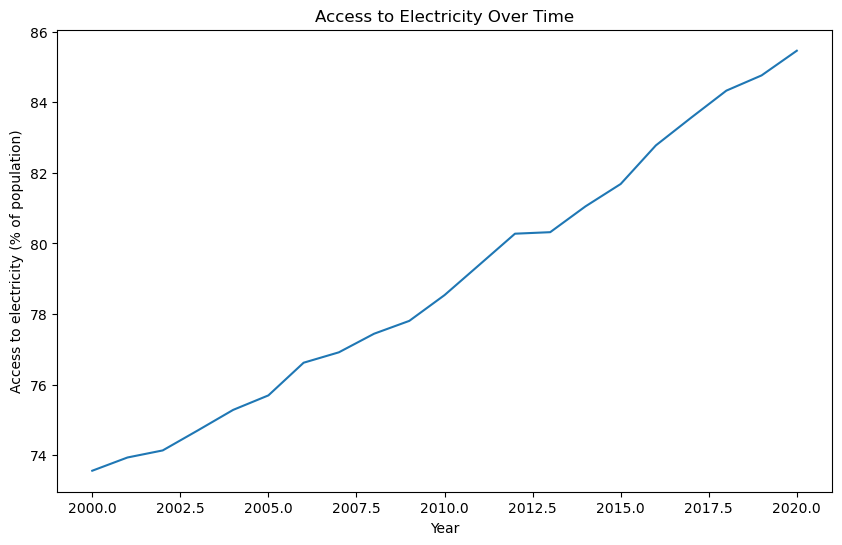

In [25]:
# Time Series Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='Access to electricity (% of population)', ci=None)
plt.title('Access to Electricity Over Time')
plt.xlabel('Year')
plt.ylabel('Access to electricity (% of population)')
plt.show()

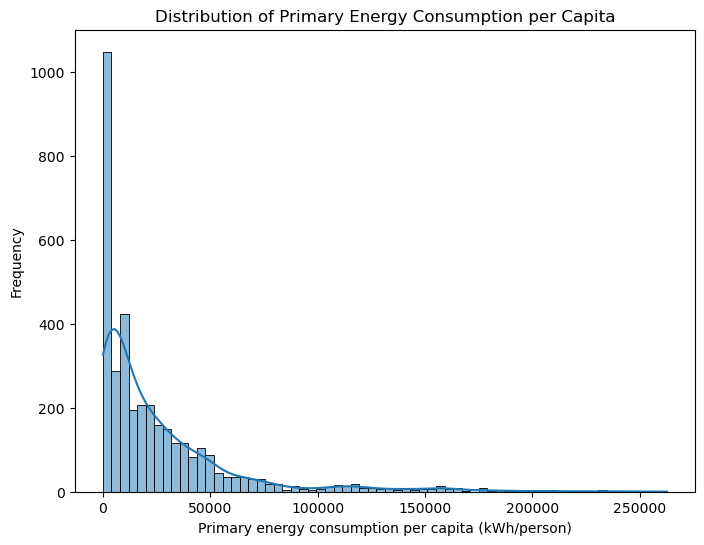

In [26]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Primary energy consumption per capita (kWh/person)', kde=True)
plt.title('Distribution of Primary Energy Consumption per Capita')
plt.xlabel('Primary energy consumption per capita (kWh/person)')
plt.ylabel('Frequency')
plt.show()

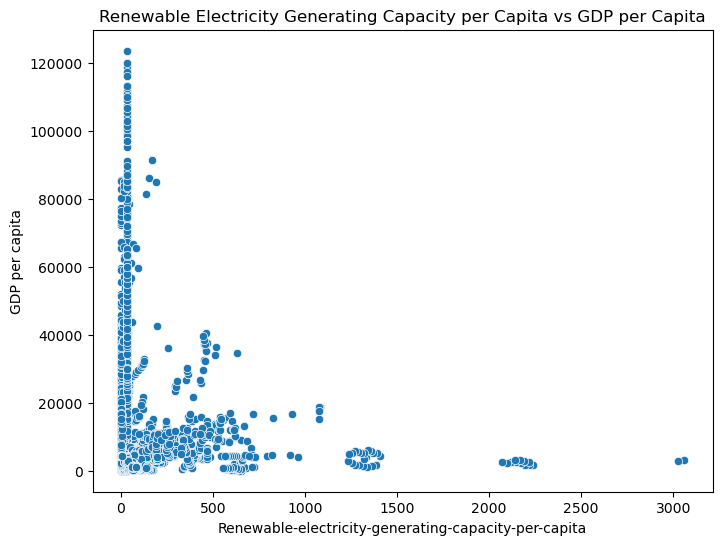

In [27]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Renewable electricity Generating Capacity per capita', y='GDP per capita')
plt.title('Renewable Electricity Generating Capacity per Capita vs GDP per Capita')
plt.xlabel('Renewable-electricity-generating-capacity-per-capita')
plt.ylabel('GDP per capita')
plt.show()

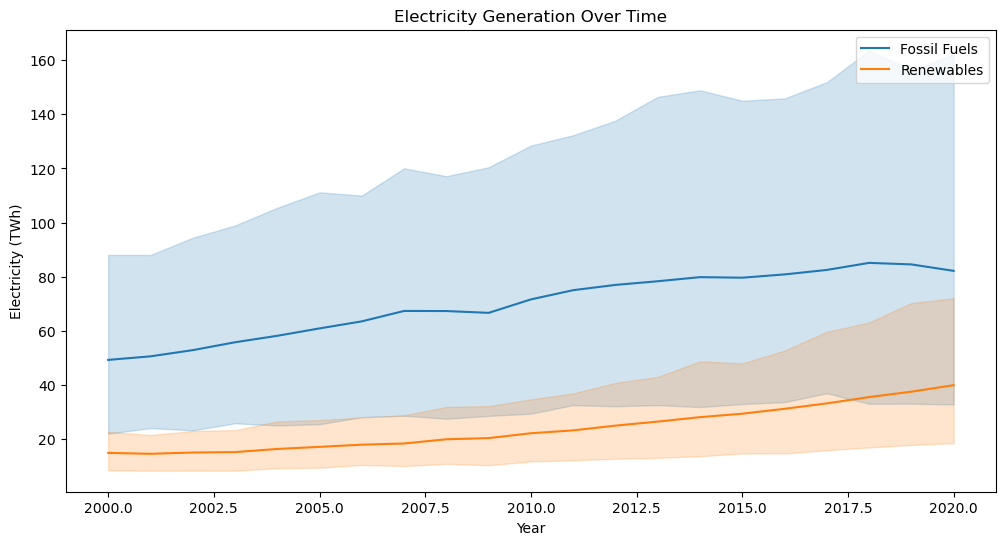

In [28]:
# Stacked Area Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='Electricity from fossil fuels (TWh)', label='Fossil Fuels')
sns.lineplot(data=data, x='Year', y='Electricity from renewables (TWh)', label='Renewables')
plt.title('Electricity Generation Over Time')
plt.xlabel('Year')
plt.ylabel('Electricity (TWh)')
plt.legend()
plt.show()

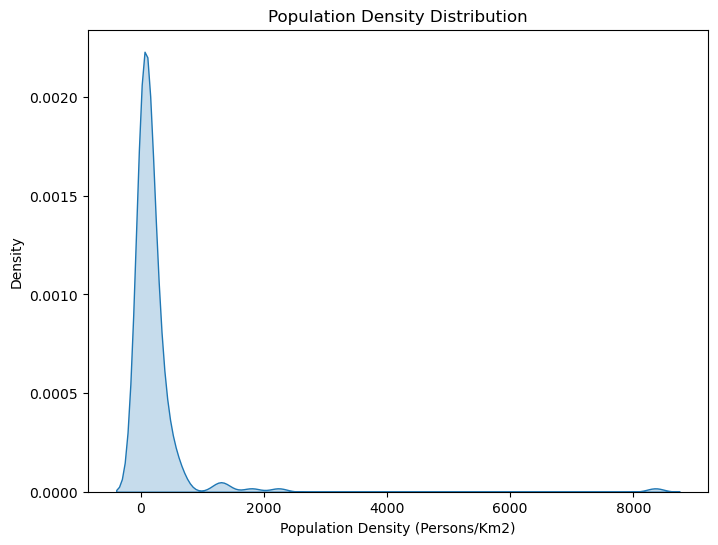

In [29]:
# Density Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='Density (P/km2)', fill=True)
plt.title('Population Density Distribution')
plt.xlabel('Population Density (Persons/Km2)')
plt.ylabel('Density')
plt.show()

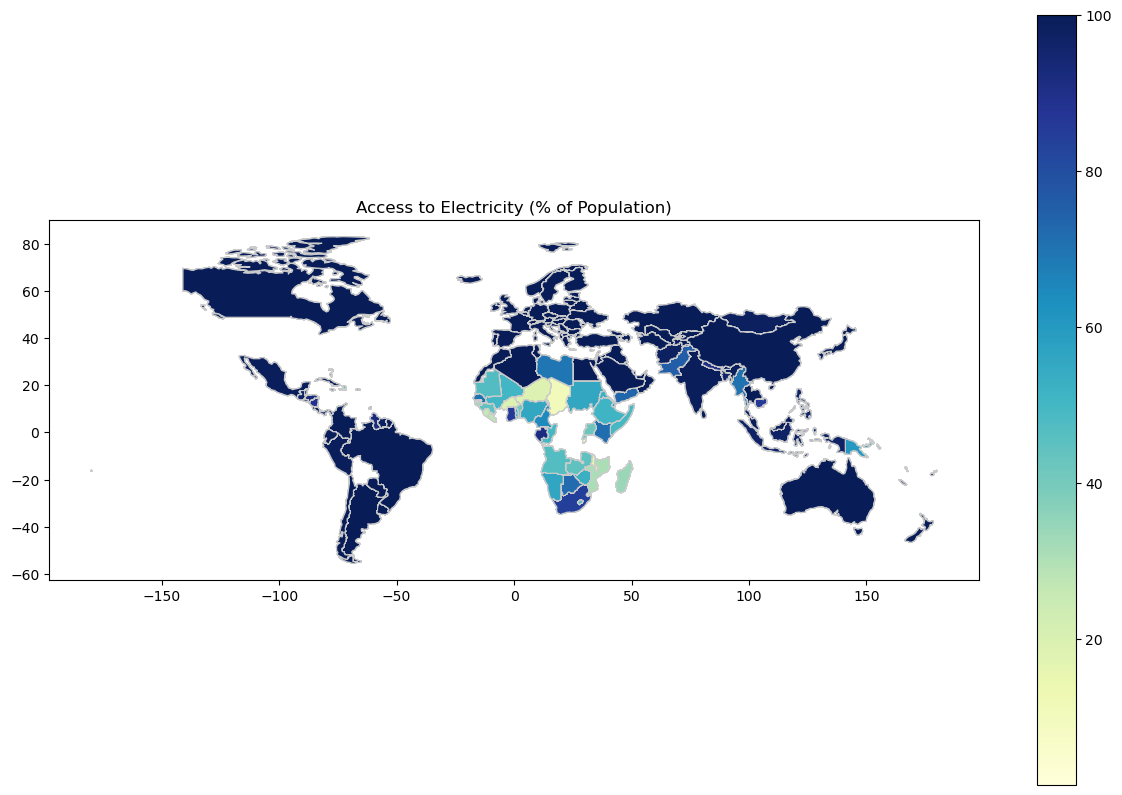

In [30]:
#Choropleth

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.merge(data, how='left', left_on='name', right_on='Entity')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Access to electricity (% of population)', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Access to Electricity (% of Population)')
plt.show()


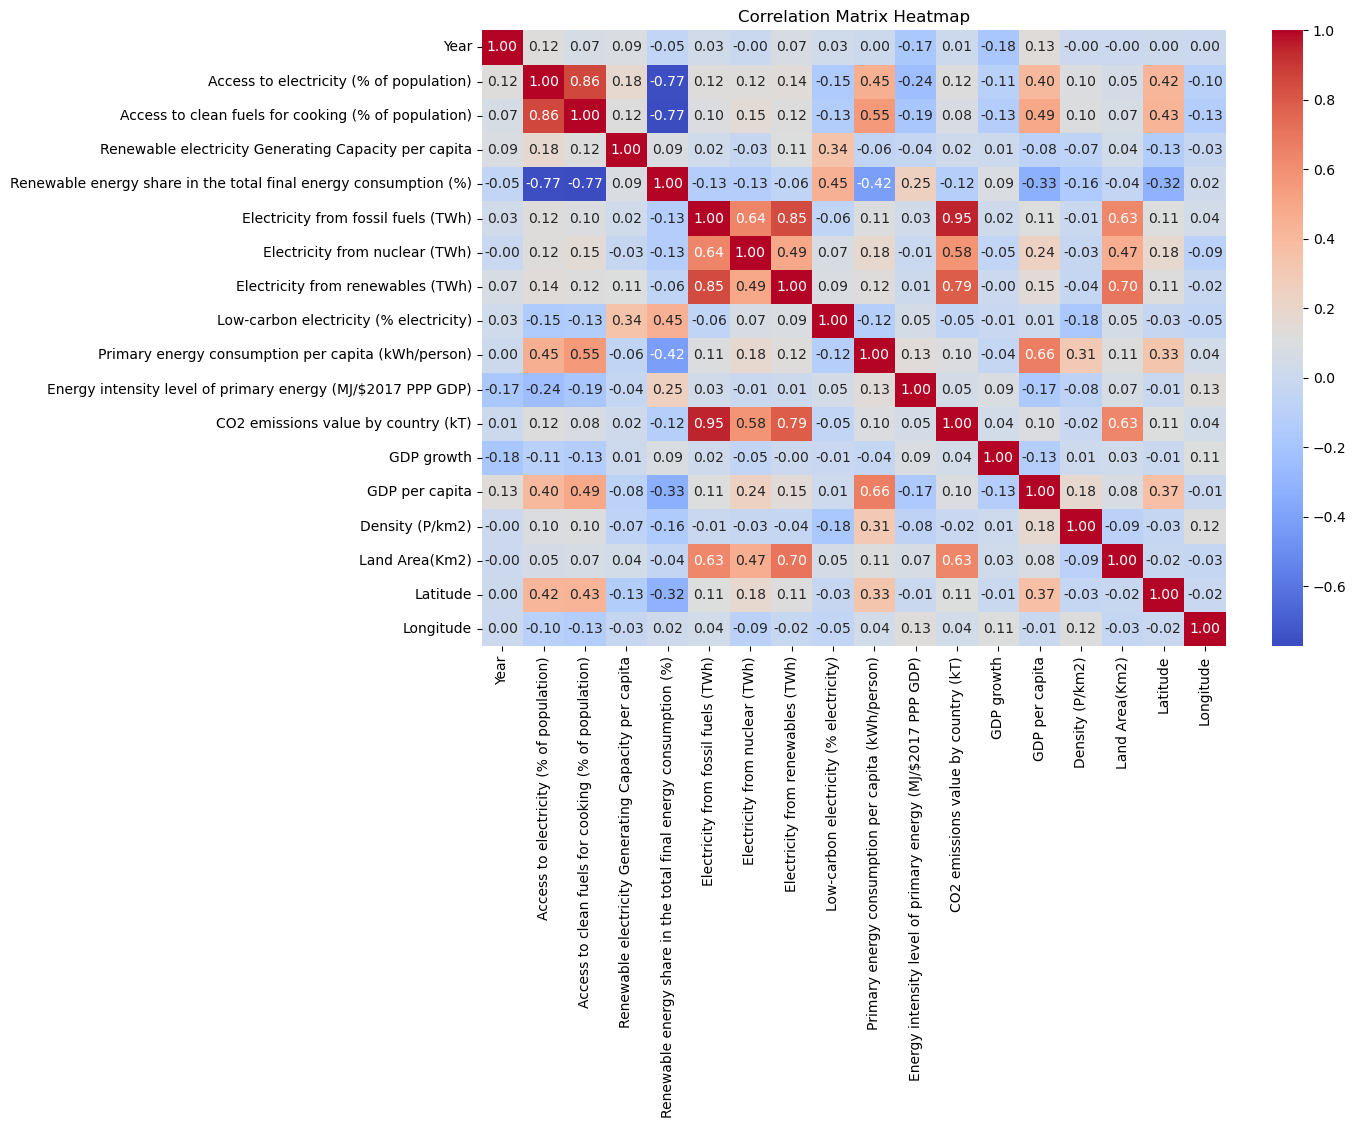

In [31]:
import seaborn as sns
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

# Correlation Analysis

In [32]:
numerical_columns = data.select_dtypes(include=['float64', 'int64'])

# Compute Pearson correlation coefficients
correlation_with_target = numerical_columns.corrwith(data['CO2 emissions value by country (kT)'])

# Print correlation coefficients
print("Correlation with 'CO2 emissions value by country (kT)':")
print(correlation_with_target)



Correlation with 'CO2 emissions value by country (kT)':
Year                                                                0.006273
Access to electricity (% of population)                             0.115784
Access to clean fuels for cooking (% of population)                 0.080797
Renewable electricity Generating Capacity per capita                0.019933
Renewable energy share in the total final energy consumption (%)   -0.117424
Electricity from fossil fuels (TWh)                                 0.948371
Electricity from nuclear (TWh)                                      0.583052
Electricity from renewables (TWh)                                   0.785686
Low-carbon electricity (% electricity)                             -0.046170
Primary energy consumption per capita (kWh/person)                  0.096291
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.049326
CO2 emissions value by country (kT)                                 1.000000
GDP growth          

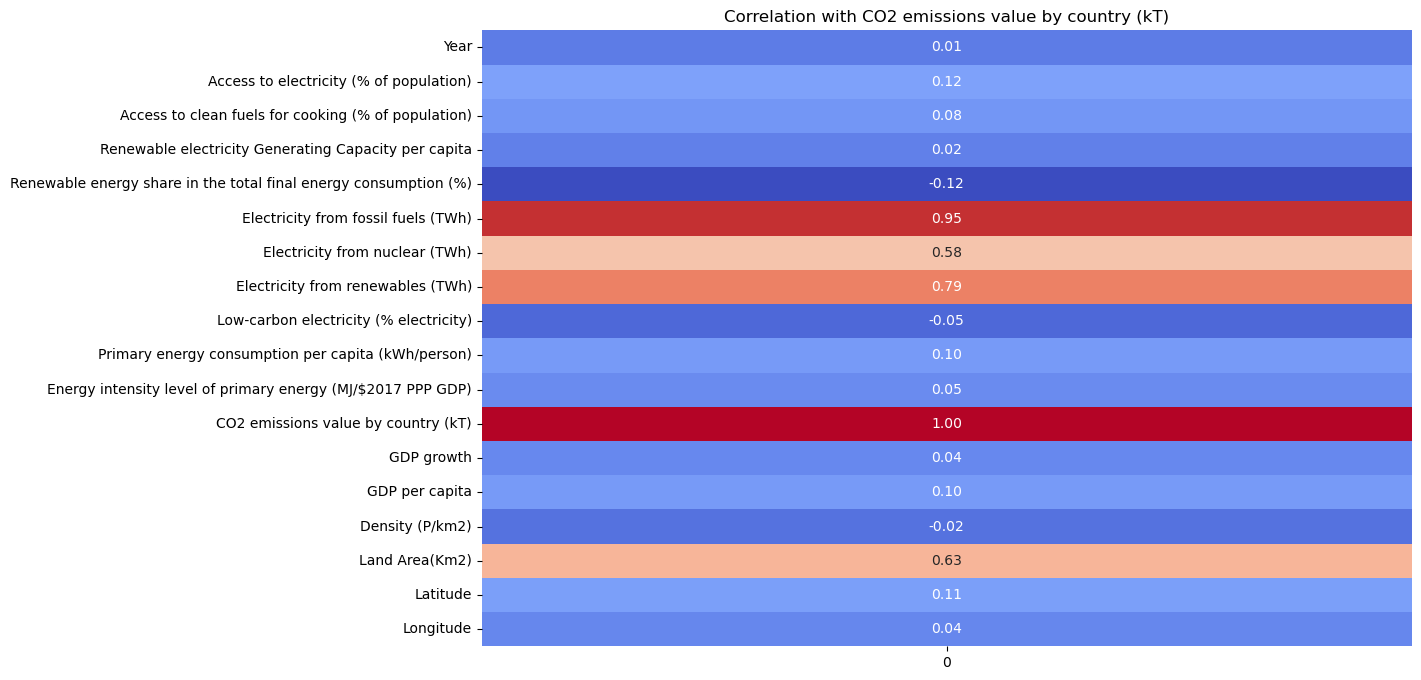

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, cbar=False)
plt.title('Correlation with CO2 emissions value by country (kT)')
plt.show()

In [34]:
print('Top 5 Most Positively Correlated to the Target Variable:')
correlation_with_target = data.corr()['CO2 emissions value by country (kT)'].sort_values(ascending=False)
print(correlation_with_target.head(6)[1:])

Top 5 Most Positively Correlated to the Target Variable:
Electricity from fossil fuels (TWh)        0.948371
Electricity from renewables (TWh)          0.785686
Land Area(Km2)                             0.634150
Electricity from nuclear (TWh)             0.583052
Access to electricity (% of population)    0.115784
Name: CO2 emissions value by country (kT), dtype: float64


In [35]:
print('Top 5 Most Negatively Correlated to the Target Variable:')
correlation_with_target = data.corr()['CO2 emissions value by country (kT)'].sort_values(ascending=True)
print(correlation_with_target.head(6)[1:])

Top 5 Most Negatively Correlated to the Target Variable:
Low-carbon electricity (% electricity)                 -0.046170
Density (P/km2)                                        -0.017081
Year                                                    0.006273
Renewable electricity Generating Capacity per capita    0.019933
Longitude                                               0.039214
Name: CO2 emissions value by country (kT), dtype: float64


In [36]:
target_correlation = correlation_matrix['CO2 emissions value by country (kT)'].abs() >= 0.5

# Drop columns with correlation < 0.5 with the target variable
data_f = data.drop(columns=correlation_matrix.columns[~target_correlation])
data_f.head()

,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),CO2 emissions value by country (kT),Land Area(Km2),Entity
0,0.16,0.0,0.31,760.000000,652230.0,Afghanistan
1,0.09,0.0,0.50,730.000000,652230.0,Afghanistan
2,0.13,0.0,0.56,1029.999971,652230.0,Afghanistan
3,0.31,0.0,0.63,1220.000029,652230.0,Afghanistan
4,0.33,0.0,0.56,1029.999971,652230.0,Afghanistan


In [37]:
data_f.shape

(3649, 6)

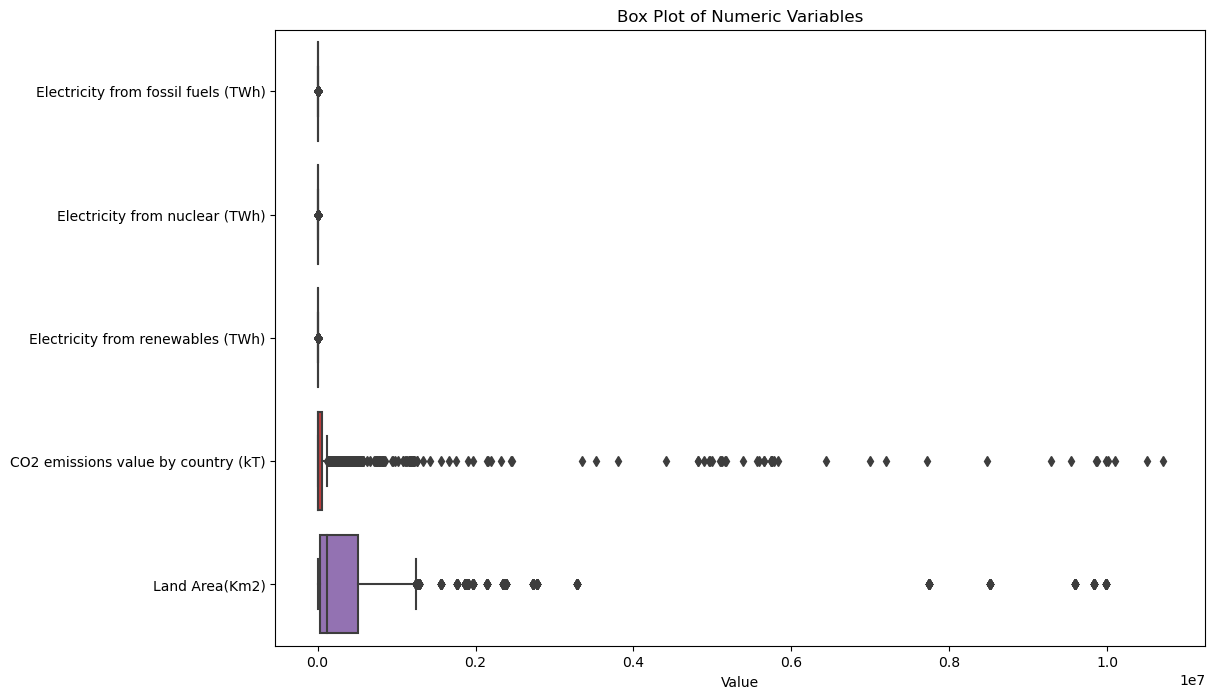

Outliers:
Electricity from fossil fuels (TWh)    519
Electricity from nuclear (TWh)         578
Electricity from renewables (TWh)      533
CO2 emissions value by country (kT)    509
Land Area(Km2)                         420
dtype: int64


In [38]:
import seaborn as sns


numeric_columns = data_f.select_dtypes(include=['float64', 'int64'])

# Finding outliers using the interquartile range (IQR) method
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR)))

# Plotting box plots for all numeric variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_columns, orient='h')
plt.title('Box Plot of Numeric Variables')
plt.xlabel('Value')
plt.show()

# Printing outliers
print("Outliers:")
print(outliers.sum())


# Principal Component Analysis

In [39]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = data.drop(columns=['Year', 'Entity']) 
y = data['CO2 emissions value by country (kT)']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)  # Choose the number of components to explain 95% of the variance
X_pca = pca.fit_transform(X_scaled)


print("Explained variance ratio:", pca.explained_variance_ratio_)


pca_df = pd.DataFrame(data=X_pca, columns=[f"PC{i}" for i in range(1, X_pca.shape[1] + 1)])
pca_df['CO2 emissions value by country (kT)'] = y


print("DataFrame with reduced dimensions:")
print(pca_df)


Explained variance ratio: [0.25304081 0.18960086]
DataFrame with reduced dimensions:
           PC1       PC2  CO2 emissions value by country (kT)
0    -1.907418  1.361618                           760.000000
1    -1.921265  1.421164                           730.000000
2    -1.825518  1.293215                          1029.999971
3    -1.757176  1.227229                          1220.000029
4    -1.696244  1.111732                          1029.999971
...        ...       ...                                  ...
3644 -2.243784  1.719006                         11020.000460
3645 -2.278570  1.793606                         10340.000150
3646 -2.239439  1.779261                         12380.000110
3647 -2.159978  1.631447                         11760.000230
3648 -2.095372  1.551008                         10500.000000

[3649 rows x 3 columns]


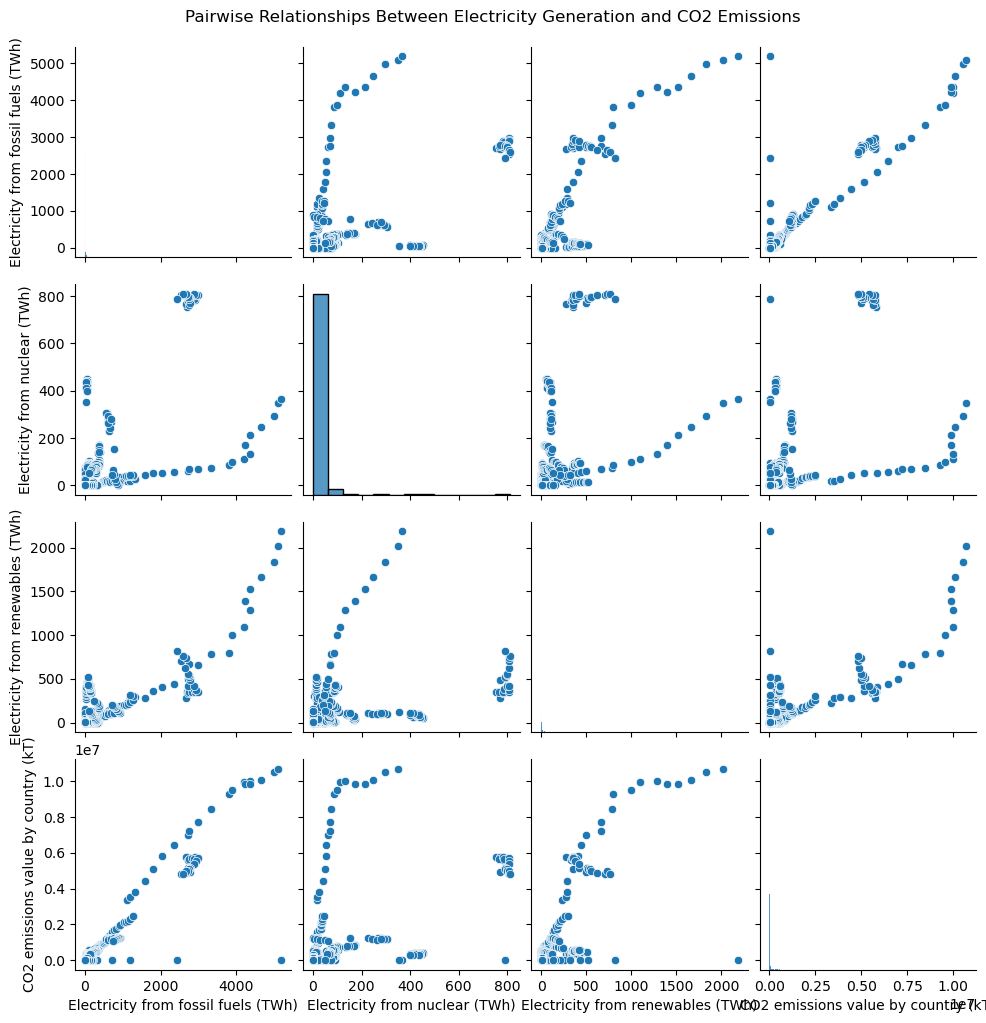

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Selecting columns of interest
columns_of_interest = ['Electricity from fossil fuels (TWh)', 
                       'Electricity from nuclear (TWh)', 
                       'Electricity from renewables (TWh)', 
                       'CO2 emissions value by country (kT)']

# Creating a DataFrame with selected columns
selected_df = data_f[columns_of_interest]

# Plotting pairplot
sns.pairplot(selected_df)
plt.suptitle('Pairwise Relationships Between Electricity Generation and CO2 Emissions', y=1.02)
plt.xticks(rotation=45)
plt.show()



In [41]:
data_f.head()

,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),CO2 emissions value by country (kT),Land Area(Km2),Entity
0,0.16,0.0,0.31,760.000000,652230.0,Afghanistan
1,0.09,0.0,0.50,730.000000,652230.0,Afghanistan
2,0.13,0.0,0.56,1029.999971,652230.0,Afghanistan
3,0.31,0.0,0.63,1220.000029,652230.0,Afghanistan
4,0.33,0.0,0.56,1029.999971,652230.0,Afghanistan


# Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder

# Label encode the 'Entity' column
label_encoder = LabelEncoder()
data_f['Entity'] = label_encoder.fit_transform(data_f['Entity'])

In [43]:
data_f.head()

,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),CO2 emissions value by country (kT),Land Area(Km2),Entity
0,0.16,0.0,0.31,760.000000,652230.0,0
1,0.09,0.0,0.50,730.000000,652230.0,0
2,0.13,0.0,0.56,1029.999971,652230.0,0
3,0.31,0.0,0.63,1220.000029,652230.0,0
4,0.33,0.0,0.56,1029.999971,652230.0,0


In [44]:
data_f.dtypes

Electricity from fossil fuels (TWh)    float64
Electricity from nuclear (TWh)         float64
Electricity from renewables (TWh)      float64
CO2 emissions value by country (kT)    float64
Land Area(Km2)                         float64
Entity                                   int32
dtype: object

# Normalization

In [45]:
#Normalization

from sklearn.preprocessing import MinMaxScaler
numeric_columns = data_f.select_dtypes(include=['float64'])

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_columns)
df_n = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

print("\n Normalized Data:")
(df_n)



 Normalized Data:


,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),CO2 emissions value by country (kT),Land Area(Km2)
0,0.000031,0.0,0.000142,0.000070,0.065321
1,0.000017,0.0,0.000229,0.000067,0.065321
2,0.000025,0.0,0.000256,0.000095,0.065321
3,0.000060,0.0,0.000288,0.000113,0.065321
4,0.000064,0.0,0.000256,0.000095,0.065321
...,...,...,...,...,...
3644,0.000675,0.0,0.001519,0.001028,0.039134
3645,0.000588,0.0,0.001968,0.000965,0.039134
3646,0.000720,0.0,0.002499,0.001155,0.039134
3647,0.000706,0.0,0.002096,0.001097,0.039134


In [46]:
df_n['Entity'] = data_f['Entity']
df_n.head()


,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),CO2 emissions value by country (kT),Land Area(Km2),Entity
0,0.000031,0.0,0.000142,0.000070,0.065321,0
1,0.000017,0.0,0.000229,0.000067,0.065321,0
2,0.000025,0.0,0.000256,0.000095,0.065321,0
3,0.000060,0.0,0.000288,0.000113,0.065321,0
4,0.000064,0.0,0.000256,0.000095,0.065321,0


In [47]:
df_n = df_n[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)','Land Area(Km2)', 'Entity', 'CO2 emissions value by country (kT)']] 
df_n.head()

,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Land Area(Km2),Entity,CO2 emissions value by country (kT)
0,0.000031,0.0,0.000142,0.065321,0,0.000070
1,0.000017,0.0,0.000229,0.065321,0,0.000067
2,0.000025,0.0,0.000256,0.065321,0,0.000095
3,0.000060,0.0,0.000288,0.065321,0,0.000113
4,0.000064,0.0,0.000256,0.065321,0,0.000095


In [48]:
# Separate predictors (features) and target variable
X = df_n.drop(columns=['CO2 emissions value by country (kT)'])  
y = df_n['CO2 emissions value by country (kT)']


# Data Mining Models

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Regressor

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Define hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Best Parameters:", grid_search.best_params_)


Mean Squared Error: 1.8080543705514794e-05
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [51]:
rf_model = RandomForestRegressor(max_depth = 10, min_samples_leaf = 2, min_samples_split = 10, n_estimators= 100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      random_state=42)

In [52]:
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r_squared = rf_model.score(X_test, y_test)

# Calculate adjusted R-squared
n = len(X_test)
k = X_test.shape[1]
rf_adjusted_r_squared = 1 - (1 - rf_r_squared) * (n - 1) / (n - k - 1)

# Calculate Root Mean Squared Error (RMSE)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

# Calculate Mean Absolute Percentage Error (MAPE)
rf_mape = np.mean(np.abs((y_test - rf_predictions) / y_test)) * 100


print("R-squared:", rf_r_squared)
print("Adjusted R-squared:", rf_adjusted_r_squared)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Percentage Error (MAPE):", rf_mape)

R-squared: 0.9927272103325954
Adjusted R-squared: 0.992676983884616
Root Mean Squared Error (RMSE): 0.004252122259003708
Mean Squared Error (MSE): 1.8080543705514794e-05
Mean Absolute Percentage Error (MAPE): inf


In [53]:
print("Actual vs Predicted:")
results = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions})
print(results)

Actual vs Predicted:
        Actual  Predicted
1406  0.000368   0.000366
3598  0.000980   0.002002
3646  0.001155   0.001116
3230  0.000200   0.000396
3114  0.025627   0.027534
...        ...        ...
343   0.009767   0.009796
1584  0.008231   0.006125
3451  0.025880   0.026195
678   0.000047   0.000277
1791  0.006528   0.006500

[730 rows x 2 columns]


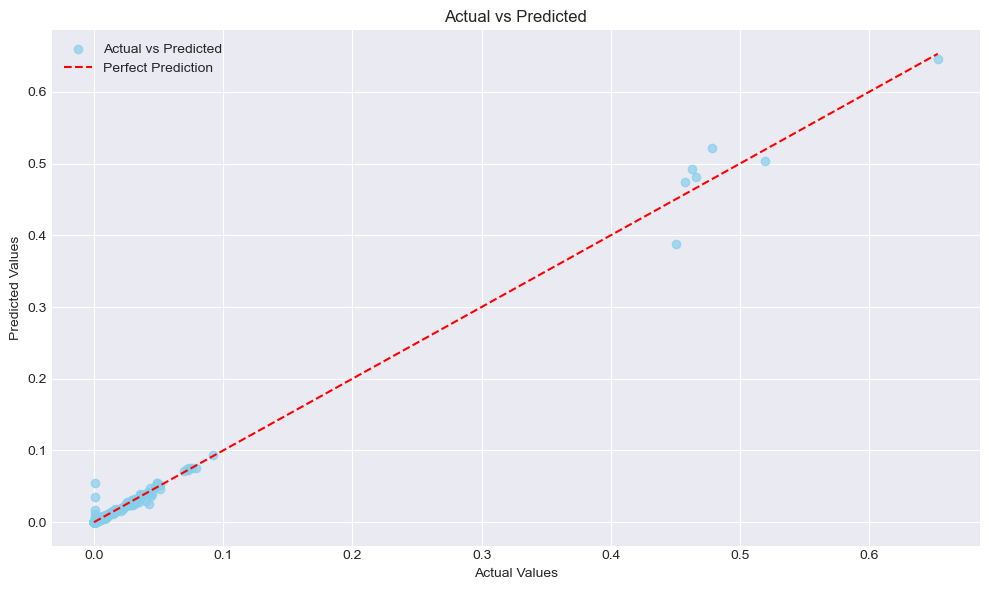

In [54]:
import matplotlib.pyplot as plt

# Set style
plt.style.use('seaborn-darkgrid')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, color='skyblue', alpha=0.7, label='Actual vs Predicted')  # Scatter plot
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')  # Diagonal line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()


## XGBoost Regressor

In [55]:
from xgboost import XGBRegressor


# Define the XGBoost regressor
xgb_reg = XGBRegressor(objective ='reg:squarederror', seed=42)


# Define hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'gamma': [0.0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mean Squared Error: 6.563065006275382e-05
Best Hyperparameters: {'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}


In [56]:
from xgboost import XGBRegressor

In [57]:
xgb_model = XGBRegressor(gamma = 0.1, learning_rate = 0.2, max_depth= 4, n_estimators= 100, subsample= 0.9)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r_squared = xgb_model.score(X_test, y_test)

# Calculate adjusted R-squared
n = len(X_test)
k = X_test.shape[1]
xgb_adjusted_r_squared = 1 - (1 - xgb_r_squared) * (n - 1) / (n - k - 1)

# Calculate Root Mean Squared Error (RMSE)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

# Calculate Mean Absolute Percentage Error (MAPE)
xgb_mape = np.mean(np.abs((y_test - xgb_predictions) / y_test)) * 100


print("R-squared:", xgb_r_squared)
print("Adjusted R-squared:", xgb_adjusted_r_squared)
print("Root Mean Squared Error (RMSE):", xgb_rmse)
print("Mean Squared Error (MSE):", xgb_mse)
print("Mean Absolute Percentage Error (MAPE):", xgb_mape)

R-squared: 0.9721900005370261
Adjusted R-squared: 0.9719979425296851
Root Mean Squared Error (RMSE): 0.008314874898682306
Mean Squared Error (MSE): 6.913714458073708e-05
Mean Absolute Percentage Error (MAPE): inf


## Linear Regression

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [60]:
# Define the Linear Regression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

LinearRegression()

In [61]:
lr_predictions = linear_reg.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r_squared = linear_reg.score(X_test, y_test)


# Calculate R-squared
lr_r_squared = linear_reg.score(X_test, y_test)

# Calculate adjusted R-squared
n = len(X_test)
k = X_test.shape[1]
lr_adjusted_r_squared = 1 - (1 - lr_r_squared) * (n - 1) / (n - k - 1)

# Calculate Root Mean Squared Error (RMSE)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

# Calculate Mean Absolute Percentage Error (MAPE)
lr_mape = np.mean(np.abs((y_test - lr_predictions) / y_test)) * 100

print("R-squared:", lr_r_squared)
print("Adjusted R-squared:", lr_adjusted_r_squared)
print("Root Mean Squared Error (RMSE):", lr_rmse)
print("Mean Squared Error (MSE):", lr_mse)
print("Mean Absolute Percentage Error (MAPE):", lr_mape)

R-squared: 0.9442600569336002
Adjusted R-squared: 0.9438751125754068
Root Mean Squared Error (RMSE): 0.011771681133269452
Mean Squared Error (MSE): 0.00013857247670337198
Mean Absolute Percentage Error (MAPE): inf


## Ridge and Lasso Regression

In [62]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV


# Define parameter grid for GridSearchCV
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize models
lasso = Lasso()
ridge = Ridge()

# Perform GridSearchCV for Lasso regression
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

# Perform GridSearchCV for Ridge regression
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

# Get best hyperparameters and scores
best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = grid_search_lasso.best_score_

best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = grid_search_ridge.best_score_

print("Best parameters for Lasso:", best_params_lasso)
print("Best RMSE score for Lasso:", (abs(best_score_lasso))**0.5)

print("Best parameters for Ridge:", best_params_ridge)
print("Best RMSE score for Ridge:", (abs(best_score_ridge))**0.5)


Best parameters for Lasso: {'alpha': 0.001}
Best RMSE score for Lasso: 0.029190191020250018
Best parameters for Ridge: {'alpha': 0.1}
Best RMSE score for Ridge: 0.02562850044600629


In [63]:
# Define the Linear Regression model
lasso_model = Lasso(alpha= 0.001)
ridge_model = Ridge(alpha= 0.1)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [64]:
r_predictions = ridge_model.predict(X_test)
r_mse = mean_squared_error(y_test, r_predictions)
r_r_squared = ridge_model.score(X_test, y_test)


# Calculate R-squared
r_r_squared = ridge_model.score(X_test, y_test)

# Calculate adjusted R-squared
n = len(X_test)
k = X_test.shape[1]
r_adjusted_r_squared = 1 - (1 - r_r_squared) * (n - 1) / (n - k - 1)

# Calculate Root Mean Squared Error (RMSE)
r_rmse = np.sqrt(mean_squared_error(y_test, r_predictions))

# Calculate Mean Absolute Percentage Error (MAPE)
r_mape = np.mean(np.abs((y_test - r_predictions) / y_test)) * 100

print("R-squared:", r_r_squared)
print("Adjusted R-squared:", r_adjusted_r_squared)
print("Root Mean Squared Error (RMSE):", r_rmse)
print("Mean Squared Error (MSE):", r_mse)
print("Mean Absolute Percentage Error (MAPE):", r_mape)

R-squared: 0.9487235018573714
Adjusted R-squared: 0.9483693823950604
Root Mean Squared Error (RMSE): 0.011290532057285817
Mean Squared Error (MSE): 0.0001274761141365987
Mean Absolute Percentage Error (MAPE): inf


In [65]:
l_predictions = lasso_model.predict(X_test)
l_mse = mean_squared_error(y_test, l_predictions)
l_r_squared = lasso_model.score(X_test, y_test)


# Calculate R-squared
l_r_squared = lasso_model.score(X_test, y_test)

# Calculate adjusted R-squared
n = len(X_test)
k = X_test.shape[1]
l_adjusted_r_squared = 1 - (1 - l_r_squared) * (n - 1) / (n - k - 1)

# Calculate Root Mean Squared Error (RMSE)
l_rmse = np.sqrt(mean_squared_error(y_test, l_predictions))

# Calculate Mean Absolute Percentage Error (MAPE)
l_mape = np.mean(np.abs((y_test - l_predictions) / y_test)) * 100

print("R-squared:", l_r_squared)
print("Adjusted R-squared:", l_adjusted_r_squared)
print("Root Mean Squared Error (RMSE):", l_rmse)
print("Mean Squared Error (MSE):", l_mse)
print("Mean Absolute Percentage Error (MAPE):", l_mape)

R-squared: 0.9154598676715364
Adjusted R-squared: 0.9148760269786603
Root Mean Squared Error (RMSE): 0.01449728547113104
Mean Squared Error (MSE): 0.00021017128603146717
Mean Absolute Percentage Error (MAPE): inf


## KNN Regression

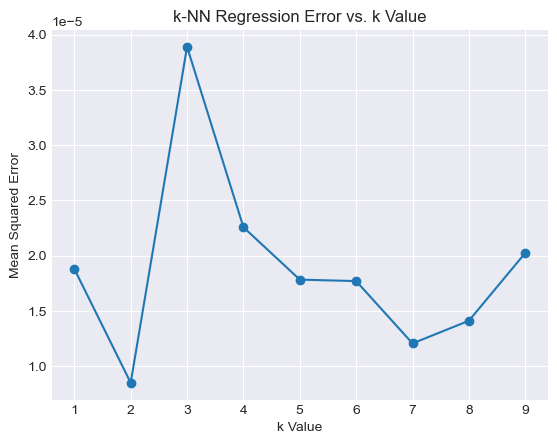

In [72]:
k_values = list(range(1, 10))


errors = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(mean_squared_error(y_test, y_pred))


plt.plot(k_values, errors, marker='o')
plt.title('k-NN Regression Error vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [73]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


# Define parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 11)),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Initialize KNN regressor
knn = KNeighborsRegressor(n_neighbors=2)

# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get best hyperparameters and scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best RMSE score:", (abs(best_score))**0.5)


Best parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best RMSE score: 0.02211096818580455


In [74]:
# Define the Linear Regression model
knn_model = KNeighborsRegressor(metric= 'euclidean', n_neighbors= 5, weights= 'uniform')

# Fit the model to the training data
knn_model.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean')

In [75]:
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r_squared = knn_model.score(X_test, y_test)


# Calculate R-squared
knn_r_squared = knn_model.score(X_test, y_test)

# Calculate adjusted R-squared
n = len(X_test)
k = X_test.shape[1]
knn_adjusted_r_squared = 1 - (1 - knn_r_squared) * (n - 1) / (n - k - 1)

# Calculate Root Mean Squared Error (RMSE)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))

# Calculate Mean Absolute Percentage Error (MAPE)
knn_mape = np.mean(np.abs((y_test - knn_predictions) / y_test)) * 100

print("R-squared:", knn_r_squared)
print("Adjusted R-squared:", knn_adjusted_r_squared)
print("Root Mean Squared Error (RMSE):", knn_rmse)
print("Mean Squared Error (MSE):", knn_mse)
print("Mean Absolute Percentage Error (MAPE):", knn_mape)

R-squared: 0.9928293207368226
Adjusted R-squared: 0.992779799471193
Root Mean Squared Error (RMSE): 0.004222166716834605
Mean Squared Error (MSE): 1.7826691784745904e-05
Mean Absolute Percentage Error (MAPE): 41.28763295692476


# Performance Comparison

In [76]:
import pandas as pd


models_performance = {
    'Model': ['Linear Regression', 'Lasso LR', 'Ridge LR', 'KNN Regressor','XGBoost Regressor', 'Random Forest Regressor'],
    'MSE': [0.0001,0.0002,0.0001,0.00001,0.00006,0.00001],
    'RMSE': [0.012,0.014,0.011,0.004,0.008,0.004],
    'R2': [0.944,0.915,0.948,0.992,0.972,0.993],
    'Adjusted R2': [0.943,0.914,0.948,0.992,0.972,0.992]
}

# Create a DataFrame from the performance metrics
summary_table = pd.DataFrame(models_performance)

# Display the summary table
print('Performance Summary Table')
summary_table


Performance Summary Table


,Model,MSE,RMSE,R2,Adjusted R2
0,Linear Regression,0.00010,0.012,0.944,0.943
1,Lasso LR,0.00020,0.014,0.915,0.914
2,Ridge LR,0.00010,0.011,0.948,0.948
3,KNN Regressor,0.00001,0.004,0.992,0.992
4,XGBoost Regressor,0.00006,0.008,0.972,0.972
5,Random Forest Regressor,0.00001,0.004,0.993,0.992
